# Diamonds 'cut' prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
test_df = pd.read_csv('./diamonds_exercise/test_diamonds.csv')
train_df = pd.read_csv('./diamonds_exercise/train_diamonds.csv')

In [3]:
l_tr = train_df.iloc[:,1:4]
l_te = test_df.iloc[:,1:3]

## Convert Categorical data into Numeric data using Label Encoding 

In [4]:
categories_mapping1 = {'Good':1, 'Ideal':2, 'Very Good':3, 'Premium':4, 'Fair':5}
categories_mapping2 = {'G':1, 'E':2, 'F':3,'H':4,'D':5,'I':6,'J':7}
categories_mapping3 = {'SI1':1, 'VS2':2, 'SI2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7,'I1':8}
l_tr['cut'] = [categories_mapping1[category] for category in l_tr['cut'].values]
l_tr['color'] = [categories_mapping2[category] for category in l_tr['color'].values]
l_tr['clarity'] = [categories_mapping3[category] for category in l_tr['clarity'].values]
l_tr

,cut,color,clarity
0,1,1,1
1,2,2,1
2,2,3,3
3,3,2,1
4,4,6,3
...,...,...,...
32359,2,2,4
32360,4,2,1
32361,2,3,2
32362,2,6,2


In [5]:
categories_mapping2 = {'G':1, 'E':2, 'F':3,'H':4,'D':5,'I':6,'J':7}
categories_mapping3 = {'SI1':1, 'VS2':2, 'SI2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7,'I1':8}
l_te['color'] = [categories_mapping2[category] for category in l_te['color'].values]
l_te['clarity'] = [categories_mapping3[category] for category in l_te['clarity'].values]
l_te

,color,clarity
0,7,5
1,4,6
2,5,3
3,2,2
4,2,5
...,...,...
21571,1,2
21572,2,1
21573,4,2
21574,1,6


In [6]:
train_df = train_df.drop(columns=['cut','color','clarity'], axis=1)


In [7]:
train_df = pd.concat([train_df, l_tr], axis=1)
train_df

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.50,63.9,57.0,1286,5.06,5.02,3.22,1,1,1
1,0.38,62.1,55.0,660,4.64,4.67,2.89,2,2,1
2,0.70,61.1,56.0,2183,5.71,5.78,3.51,2,3,3
3,0.30,63.2,57.0,675,4.30,4.25,2.70,3,2,1
4,2.20,62.4,55.0,16190,8.41,8.34,5.23,4,6,3
...,...,...,...,...,...,...,...,...,...,...
32359,0.54,61.2,57.0,1962,5.25,5.27,3.22,2,2,4
32360,1.06,59.2,60.0,4078,6.64,6.60,3.92,4,2,1
32361,0.57,59.2,57.0,1637,5.45,5.50,3.24,2,3,2
32362,1.09,61.9,56.0,5421,6.62,6.67,4.09,2,6,2


In [8]:
test_df = test_df.drop(columns=['color','clarity'], axis=1)

In [9]:
test_df = pd.concat([test_df, l_te], axis=1)
test_df

,carat,depth,table,price,x,y,z,color,clarity
0,2.05,62.7,56.0,17214,8.18,8.11,5.11,7,5
1,0.30,62.2,58.0,878,4.29,4.26,2.66,4,6
2,0.35,62.4,55.0,669,4.54,4.53,2.83,5,3
3,1.16,62.1,58.0,8520,6.63,6.70,4.14,2,2
4,0.52,61.9,55.0,2371,5.15,5.19,3.20,2,5
...,...,...,...,...,...,...,...,...,...
21571,1.11,61.5,58.0,7055,6.69,6.62,4.09,1,2
21572,0.71,63.2,57.0,2516,5.72,5.67,3.60,2,1
21573,1.02,61.8,58.0,5241,6.49,6.43,3.99,4,2
21574,0.32,60.8,56.0,1080,4.44,4.37,2.68,1,6


In [10]:
a = train_df.iloc[:,8:]
b = train_df.iloc[:,:8]
train_df = pd.concat([a,b], axis=1)
train_df

,color,clarity,carat,depth,table,price,x,y,z,cut
0,1,1,0.50,63.9,57.0,1286,5.06,5.02,3.22,1
1,2,1,0.38,62.1,55.0,660,4.64,4.67,2.89,2
2,3,3,0.70,61.1,56.0,2183,5.71,5.78,3.51,2
3,2,1,0.30,63.2,57.0,675,4.30,4.25,2.70,3
4,6,3,2.20,62.4,55.0,16190,8.41,8.34,5.23,4
...,...,...,...,...,...,...,...,...,...,...
32359,2,4,0.54,61.2,57.0,1962,5.25,5.27,3.22,2
32360,2,1,1.06,59.2,60.0,4078,6.64,6.60,3.92,4
32361,3,2,0.57,59.2,57.0,1637,5.45,5.50,3.24,2
32362,6,2,1.09,61.9,56.0,5421,6.62,6.67,4.09,2


In [11]:
X = train_df.iloc[:,:9]
y = train_df.iloc[:,9]


## Split the datasets into train_validation_test datasets

In [12]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

## Choose ML model

In [13]:
#ML lib
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

#ML metrics Lib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
dt_model = DecisionTreeClassifier(random_state=123).fit(X_tr, y_tr)
dt_yhat = dt_model.predict(X_val)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
rf_yhat = rf_model.predict(X_val)

knn_model = KNeighborsClassifier(n_jobs=-1).fit(X_tr, y_tr)
knn_yhat = knn_model.predict(X_val)

svm_model = SVC(random_state=123).fit(X_tr, y_tr)
svm_yhat = svm_model.predict(X_val)

lr_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lr_yhat = lr_model.predict(X_val)

lgbm_model = LGBMClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lgbm_yhat = lgbm_model.predict(X_val)

### Model Evaluation Scores

In [15]:
data={'dt_model':[accuracy_score(y_val, dt_yhat), precision_score(y_val, dt_yhat, average='macro', zero_division=1), recall_score(y_val, dt_yhat, average='macro'), f1_score(y_val, dt_yhat, average='macro')],
     'rf_model':[accuracy_score(y_val, rf_yhat), precision_score(y_val, rf_yhat, average='macro', zero_division=1), recall_score(y_val, rf_yhat, average='macro'), f1_score(y_val, rf_yhat, average='macro')],
     'knn_model':[accuracy_score(y_val, knn_yhat), precision_score(y_val, knn_yhat, average='macro', zero_division=1), recall_score(y_val, knn_yhat, average='macro'), f1_score(y_val, knn_yhat, average='macro')],
     'svm_model':[accuracy_score(y_val, svm_yhat), precision_score(y_val, svm_yhat, average='macro', zero_division=1), recall_score(y_val, svm_yhat, average='macro'), f1_score(y_val, svm_yhat, average='macro')],
     'lr_model':[accuracy_score(y_val, lr_yhat), precision_score(y_val, lr_yhat, average='macro', zero_division=1), recall_score(y_val, lr_yhat, average='macro'), f1_score(y_val, lr_yhat, average='macro')],
     'lgbm_model':[accuracy_score(y_val, lgbm_yhat), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), recall_score(y_val, lgbm_yhat, average='macro'), f1_score(y_val, lgbm_yhat, average='macro')]}

In [16]:
score_box = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['dt_model', 'rf_model','knn_model', 'svm_model','lr_model','lgbm_model'], data=data)
score_box

,dt_model,rf_model,knn_model,svm_model,lr_model,lgbm_model
accuracy,0.702611,0.775220,0.501622,0.402132,0.548123,0.792677
precision,0.704169,0.791065,0.535608,0.750159,0.655770,0.804476
recall,0.705427,0.765434,0.334204,0.206420,0.324137,0.781349
f1,0.704643,0.774883,0.334811,0.140977,0.260842,0.791068


In [17]:
final_data={'rf_model':[accuracy_score(y_val, rf_yhat), precision_score(y_val, rf_yhat, average='macro', zero_division=1), recall_score(y_val, rf_yhat, average='macro'), f1_score(y_val, rf_yhat, average='macro')],
     'lgbm_model':[accuracy_score(y_val, lgbm_yhat), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), recall_score(y_val, lgbm_yhat, average='macro'), f1_score(y_val, lgbm_yhat, average='macro')]}

In [18]:
final_score_box = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['rf_model','lgbm_model'], data=final_data)
final_score_box

,rf_model,lgbm_model
accuracy,0.775220,0.792677
precision,0.791065,0.804476
recall,0.765434,0.781349
f1,0.774883,0.791068


* RandomForestClassifier and LightGBM shows the best performance. since their scores are above 70%, i choose to use these two models.

## Check Outliers in the features

<Axes: >

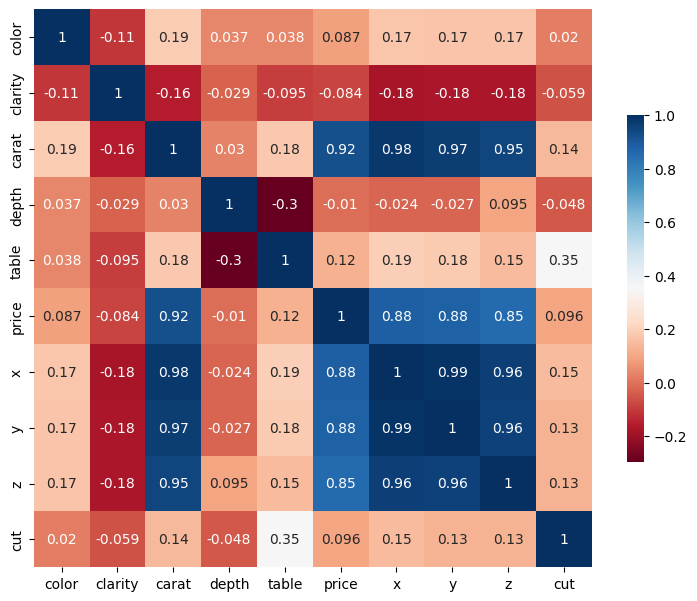

In [19]:
plt.figure(figsize=(9,9))
corr = train_df.corr()
sns.heatmap(corr, cmap='RdBu',annot=True, square=True, cbar_kws={"shrink": .5})

In [20]:
outliers = []
# Replace 'features' with any column you wish to check for outliers
# Calculate Q1, Q3, and IQR
for i in range(len(train_df.columns)):
    if i == 'cut':
        pass
    elif i == 'color':
        pass
    elif i == 'clarity':
        pass
    else:
        Q1 = train_df.iloc[:,i].quantile(0.25)
        Q3 = train_df.iloc[:,i].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Identify outliers
        outlier = train_df[(train_df.iloc[:,i] < lower_bound) | (train_df.iloc[:,i] > upper_bound)]
        outliers.append(outlier)
        # Optionally, remove outliers from the DataFrame
        train_df = train_df[(train_df.iloc[:,i] >= lower_bound) & (train_df.iloc[:,i] <= upper_bound)]

In [21]:
outliers

[Empty DataFrame
 Columns: [color, clarity, carat, depth, table, price, x, y, z, cut]
 Index: [],
        color  clarity  carat  depth  table  price     x     y     z  cut
 23         4        8   3.24   62.1   58.0  12300  9.44  9.40  5.85    4
 35         4        8   0.96   60.1   62.0   1808  6.21  6.00  3.68    5
 52         3        8   0.94   61.5   55.0   2594  6.37  6.34  3.91    2
 238        2        8   1.52   57.3   58.0   3105  7.53  7.42  4.28    1
 290        1        8   1.54   61.6   55.0   6186  7.40  7.43  4.57    2
 ...      ...      ...    ...    ...    ...    ...   ...   ...   ...  ...
 32042      4        8   0.76   64.5   57.0   1140  5.79  5.76  3.73    5
 32084      4        8   1.02   62.5   60.0   3199  6.41  6.39  4.00    4
 32196      1        8   0.59   59.7   59.0    940  5.48  5.45  3.26    4
 32247      2        8   0.91   59.6   59.0   2464  6.29  6.32  3.76    4
 32327      7        8   1.72   68.5   59.0   5240  7.31  7.24  4.98    5
 
 [454 rows x

In [22]:
train_df = train_df.reset_index()

In [23]:
train_df = train_df.drop(columns='index', axis=1)
train_df

,color,clarity,carat,depth,table,price,x,y,z,cut
0,1,1,0.50,63.9,57.0,1286,5.06,5.02,3.22,1
1,2,1,0.38,62.1,55.0,660,4.64,4.67,2.89,2
2,3,3,0.70,61.1,56.0,2183,5.71,5.78,3.51,2
3,2,1,0.30,63.2,57.0,675,4.30,4.25,2.70,3
4,2,3,0.90,60.1,62.0,3804,6.28,6.24,3.76,4
...,...,...,...,...,...,...,...,...,...,...
27663,2,4,0.54,61.2,57.0,1962,5.25,5.27,3.22,2
27664,2,1,1.06,59.2,60.0,4078,6.64,6.60,3.92,4
27665,3,2,0.57,59.2,57.0,1637,5.45,5.50,3.24,2
27666,6,2,1.09,61.9,56.0,5421,6.62,6.67,4.09,2


In [24]:
X=train_df.iloc[:,:9]
y=train_df.iloc[:,9]
X

,color,clarity,carat,depth,table,price,x,y,z
0,1,1,0.50,63.9,57.0,1286,5.06,5.02,3.22
1,2,1,0.38,62.1,55.0,660,4.64,4.67,2.89
2,3,3,0.70,61.1,56.0,2183,5.71,5.78,3.51
3,2,1,0.30,63.2,57.0,675,4.30,4.25,2.70
4,2,3,0.90,60.1,62.0,3804,6.28,6.24,3.76
...,...,...,...,...,...,...,...,...,...
27663,2,4,0.54,61.2,57.0,1962,5.25,5.27,3.22
27664,2,1,1.06,59.2,60.0,4078,6.64,6.60,3.92
27665,3,2,0.57,59.2,57.0,1637,5.45,5.50,3.24
27666,6,2,1.09,61.9,56.0,5421,6.62,6.67,4.09


In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
rf_yhat = rf_model.predict(X_val)

lgbm_model = LGBMClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lgbm_yhat = lgbm_model.predict(X_val)

### Model Evaluation after removing outliers

In [26]:
final_data1={'rf_model_rm_outlier':[accuracy_score(y_val, rf_yhat), precision_score(y_val, rf_yhat, average='macro', zero_division=1), recall_score(y_val, rf_yhat, average='macro'), f1_score(y_val, rf_yhat, average='macro')],
     'lgbm_model_rm_outlier':[accuracy_score(y_val, lgbm_yhat), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), recall_score(y_val, lgbm_yhat, average='macro'), f1_score(y_val, lgbm_yhat, average='macro')]}

In [27]:
final_score_box1 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['rf_model_rm_outlier','lgbm_model_rm_outlier'], data=final_data1)
final_score_box1

,rf_model_rm_outlier,lgbm_model_rm_outlier
accuracy,0.779364,0.793459
precision,0.794350,0.802876
recall,0.724279,0.716663
f1,0.752559,0.751958


In [28]:
final_score_box = pd.concat([final_score_box, final_score_box1], axis=1)
final_score_box

,rf_model,lgbm_model,rf_model_rm_outlier,lgbm_model_rm_outlier
accuracy,0.775220,0.792677,0.779364,0.793459
precision,0.791065,0.804476,0.794350,0.802876
recall,0.765434,0.781349,0.724279,0.716663
f1,0.774883,0.791068,0.752559,0.751958


### Feature importance (no outlier models)

<Axes: >

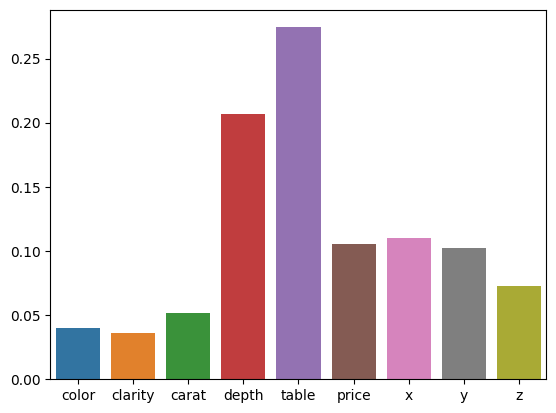

In [29]:
rf_ftr_imp = rf_model.feature_importances_
rf_ftr_imp

a = pd.DataFrame(data = rf_ftr_imp, index=['color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
a = a.transpose()

sns.barplot(a)

<Axes: >

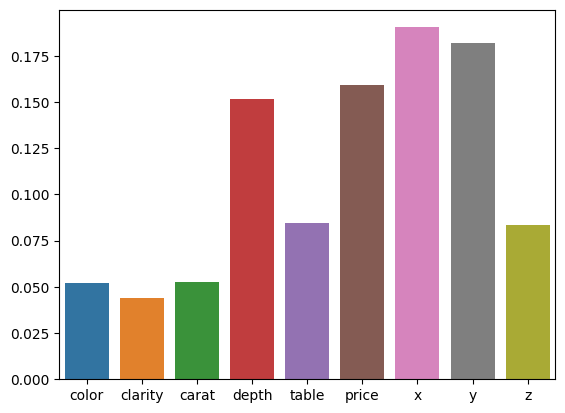

In [30]:
lgbm_ftr_imp = lgbm_model.feature_importances_
lgbm_ftr_imp = lgbm_ftr_imp/np.sum(lgbm_ftr_imp)
b = pd.DataFrame(data = lgbm_ftr_imp, index=['color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
b = b.transpose()
sns.barplot(b)

In [31]:
feature_imp = pd.concat([a,b], axis=0)
feature_imp = feature_imp.reset_index(drop=True)
feature_imp_df = feature_imp.rename(index={0:'rf_model', 1:'lgbm_model'})
feature_imp_df 

,color,clarity,carat,depth,table,price,x,y,z
rf_model,0.039841,0.036307,0.051852,0.207088,0.274348,0.105421,0.110144,0.102370,0.072629
lgbm_model,0.052267,0.044067,0.052600,0.151533,0.084667,0.159200,0.190400,0.181733,0.083533


### Voting with no outlier model

In [32]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('rf_model', rf_model), ('lgbm_model', lgbm_model)], voting='soft',n_jobs=-1).fit(X_tr, y_tr)
vot_yhat = voting.predict(X_val)
print('Voting_acc: ', accuracy_score(y_val, vot_yhat))
print('Voting_prec: ',precision_score(y_val, vot_yhat, average= 'macro', zero_division=1))
print('Voting_recall: ',recall_score(y_val, vot_yhat, average='macro'))
print('Voting_f1: ',f1_score(y_val, vot_yhat, average='macro'))

Voting_acc:  0.7930972172027466
Voting_prec:  0.8065538734304324
Voting_recall:  0.7264830724239373
Voting_f1:  0.7592689371457627


## Check unbalanced distribution in our target class

In [33]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [34]:
y_tr.value_counts()

cut
2    9630
4    5536
3    5119
1    1734
5     115
Name: count, dtype: int64

In [35]:
y_tr.value_counts()/y_tr.shape[0]

cut
2    0.435077
4    0.250113
3    0.231273
1    0.078341
5    0.005196
Name: count, dtype: float64

In [36]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(n_jobs=-1, random_state=123)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr,y_tr)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [37]:
y_tr_smote.value_counts()

cut
1    9630
3    9630
4    9630
2    9630
5    9630
Name: count, dtype: int64

In [38]:
y_tr_smote.value_counts()/y_tr_smote.shape[0]

cut
1    0.2
3    0.2
4    0.2
2    0.2
5    0.2
Name: count, dtype: float64

In [39]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=123).fit(X_tr_smote, y_tr_smote)
rf_yhat = rf_model.predict(X_val)

lgbm_model = LGBMClassifier(n_jobs=-1, random_state=123).fit(X_tr_smote, y_tr_smote)
lgbm_yhat = lgbm_model.predict(X_val)

In [40]:
final_data1={'rf_model_smote':[accuracy_score(y_val, rf_yhat), precision_score(y_val, rf_yhat, average='macro', zero_division=1), recall_score(y_val, rf_yhat, average='macro'), f1_score(y_val, rf_yhat, average='macro')],
     'lgbm_model_smote':[accuracy_score(y_val, lgbm_yhat), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), recall_score(y_val, lgbm_yhat, average='macro'), f1_score(y_val, lgbm_yhat, average='macro')]}

In [41]:
final_score_box2 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['rf_model_smote','lgbm_model_smote'], data=final_data1)
final_score_box2

,rf_model_smote,lgbm_model_smote
accuracy,0.770690,0.788218
precision,0.694856,0.726935
recall,0.754388,0.749185
f1,0.715488,0.733613


In [42]:
final_score_box = pd.concat([final_score_box, final_score_box2], axis=1)
final_score_box

,rf_model,lgbm_model,rf_model_rm_outlier,lgbm_model_rm_outlier,rf_model_smote,lgbm_model_smote
accuracy,0.775220,0.792677,0.779364,0.793459,0.770690,0.788218
precision,0.791065,0.804476,0.794350,0.802876,0.694856,0.726935
recall,0.765434,0.781349,0.724279,0.716663,0.754388,0.749185
f1,0.774883,0.791068,0.752559,0.751958,0.715488,0.733613


## Feature Engineering(Removing  color and clarity)

In [43]:
Xa = X.drop(columns=['color', 'clarity'])


In [44]:
X_tr, X_val, y_tr, y_val = train_test_split(Xa, y, test_size=0.2, stratify=y, random_state=123)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
rf_yhat = rf_model.predict(X_val)

lgbm_model = LGBMClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lgbm_yhat = lgbm_model.predict(X_val)

In [45]:
final_data1={'rf_model_no_feat':[accuracy_score(y_val, rf_yhat), precision_score(y_val, rf_yhat, average='macro', zero_division=1), recall_score(y_val, rf_yhat, average='macro'), f1_score(y_val, rf_yhat, average='macro')],
     'lgbm_model_rm_no_feat':[accuracy_score(y_val, lgbm_yhat), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), recall_score(y_val, lgbm_yhat, average='macro'), f1_score(y_val, lgbm_yhat, average='macro')]}

In [46]:
final_score_box4 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1'], columns=['rf_model_no_feat','lgbm_model_rm_no_feat'], data=final_data1)
final_score_box4

,rf_model_no_feat,lgbm_model_rm_no_feat
accuracy,0.781171,0.793639
precision,0.796498,0.806064
recall,0.720139,0.743093
f1,0.750872,0.770329


In [47]:
final_score_box = pd.concat([final_score_box, final_score_box4], axis=1)
final_score_box

,rf_model,lgbm_model,rf_model_rm_outlier,lgbm_model_rm_outlier,rf_model_smote,lgbm_model_smote,rf_model_no_feat,lgbm_model_rm_no_feat
accuracy,0.775220,0.792677,0.779364,0.793459,0.770690,0.788218,0.781171,0.793639
precision,0.791065,0.804476,0.794350,0.802876,0.694856,0.726935,0.796498,0.806064
recall,0.765434,0.781349,0.724279,0.716663,0.754388,0.749185,0.720139,0.743093
f1,0.774883,0.791068,0.752559,0.751958,0.715488,0.733613,0.750872,0.770329


## Tuning hyperparameters by HyperOpt function


### RandomForestClassifier HyperOpt tuning 

In [48]:
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

rf_search_space = {'n_estimators': hp.quniform('n_estimators', 100, 1000, 100), 
                    'max_depth': hp.quniform('max_depth', 2,10,1),
                    'min_samples_split': hp.quniform('min_samples_split', 2,10,1),
                    'min_samples_leaf': hp.quniform('min_samples_leaf', 2,10,1)}

def rf_objective_func(search_space):
    rf_model = RandomForestClassifier(min_samples_leaf=int(search_space['min_samples_leaf']), 
                                    min_samples_split=int(search_space['min_samples_split']),
                                    max_depth=int(search_space['max_depth']),
                                    n_estimators=int(search_space['n_estimators']), 
                                    n_jobs=-1,
                                    random_state=123)

    precision_scorer = make_scorer(precision_score, average='macro', zero_division=0)
    recall_scorer = make_scorer(recall_score, average='macro')
    f1_scorer = make_scorer(f1_score, average='macro')
    accuracy_scorer = make_scorer(accuracy_score)
    
    scoring_metrics = {
    'accuracy': accuracy_scorer, 
    'recall_macro': recall_scorer, 
    'precision_macro': precision_scorer, 
    'f1_macro': f1_scorer
    }
    scores = cross_validate(rf_model, X_tr, y_tr, scoring=scoring_metrics, cv=3, return_train_score=False)
    
    # Example: Optimize based on negative mean accuracy for minimization
    # You can log other metrics for analysis but return a single value for optimization
    return -np.mean(scores['test_accuracy'])


In [49]:
trial_val = Trials()

rf_best = fmin(fn=rf_objective_func,
           space=rf_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trial_val, rstate=np.random.default_rng(seed=123))
print('rf_best:', rf_best)

100%|███████████████████████████████████████████████| 50/50 [03:59<00:00,  4.80s/trial, best loss: -0.7534110418360892]
rf_best: {'max_depth': 10.0, 'min_samples_leaf': 2.0, 'min_samples_split': 9.0, 'n_estimators': 300.0}


In [50]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=9, n_estimators=300, n_jobs=-1, random_state=123)
rf_model = rf_model.fit(X_tr, y_tr)
rf_yhat = rf_model.predict(X_val)

rf_data = {'rf_hyperOpt': [accuracy_score(y_val, rf_yhat), recall_score(y_val, rf_yhat, average='macro'), precision_score(y_val, rf_yhat, average='macro', zero_division=1), f1_score(y_val, rf_yhat, average='macro') ]}
print(rf_data)

{'rf_hyperOpt': [0.7571376942537044, 0.6692048392857461, 0.8086985680127367, 0.7094401441643041]}


### LightGBM HyperOpt tuning

In [51]:
lgbm_search_space = {
    'n_estimators': hp.quniform('n_estimators', 200, 1000, 200),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 2, 10, 1), 
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 10),  
}

def lgbm_objective_func(search_space):
    lgbm_model = LGBMClassifier(
        n_estimators=int(search_space['n_estimators']),
        learning_rate=search_space['learning_rate'],
        max_depth=int(search_space['max_depth']),
        colsample_bytree=search_space['colsample_bytree'],
        min_child_weight=int(search_space['min_child_weight']),
        num_leaves=int(search_space['num_leaves']), 
        n_jobs=-1, 
        random_state=123
    )

    scoring_metrics = {
        'accuracy': 'accuracy', 
        'recall_macro': 'recall_macro', 
        'precision_macro': 'precision_macro', 
        'f1_macro': 'f1_macro'
    }
    scores = cross_validate(lgbm_model, X_tr, y_tr, scoring=scoring_metrics, cv=3, return_train_score=False)
    return -np.mean(scores['test_accuracy'])

In [52]:
trial_val = Trials()

lgbm_best = fmin(fn=lgbm_objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trial_val, rstate=np.random.default_rng(seed=123))
print('lgbm_best:', lgbm_best)

100%|███████████████████████████████████████████████| 50/50 [03:25<00:00,  4.10s/trial, best loss: -0.7845848016626005]
lgbm_best: {'colsample_bytree': 0.9186020980983212, 'learning_rate': 0.021892799818293146, 'max_depth': 7.0, 'min_child_weight': 3.0, 'n_estimators': 800.0, 'num_leaves': 110.0}


In [53]:
lgbm_model = LGBMClassifier(num_leaves=30,n_estimators=400,min_child_weight=2,max_depth=3,learning_rate=0.14646704307735842,colsample_bytree=0.7563874595976903,n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lgbm_yhat = lgbm_model.predict(X_val)

In [54]:
lgbm_data = {'lgbm_hyperOpt': [accuracy_score(y_val, lgbm_yhat), recall_score(y_val, lgbm_yhat, average='macro'), precision_score(y_val, lgbm_yhat, average='macro', zero_division=1), f1_score(y_val, lgbm_yhat, average='macro') ]}
print(lgbm_data)

{'lgbm_hyperOpt': [0.7940007228044814, 0.7595951010941142, 0.807026059997944, 0.7802020619775596]}


# Predict test data

In [56]:
Xa = X.drop(columns=['color', 'clarity'])

X_tr, X_val, y_tr, y_val = train_test_split(Xa, y, test_size=0.2, stratify=y, random_state=123)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
rf_yhat = rf_model.predict(X_val)

lgbm_model = LGBMClassifier(n_jobs=-1, random_state=123).fit(X_tr, y_tr)
lgbm_yhat = lgbm_model.predict(X_val)


[3 4 2 ... 2 2 4]


In [64]:
p_df = pd.DataFrame(lgbm_yhat)

In [65]:
p_df.to_csv('정답 전민건.csv', index=False )